In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
 
%matplotlib inline

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
my_image_dir = r"/content/gdrive/My Drive/Deep Learning/Datasets/dogs_vs_cats/train/"

In [ ]:
os.listdir(my_image_dir)

['dog.9100.jpg',
 'dog.9101.jpg',
 'dog.9102.jpg',
 'dog.9103.jpg',
 'dog.9104.jpg',
 'dog.9105.jpg',
 'dog.9106.jpg',
 'dog.9107.jpg',
 'dog.9108.jpg',
 'dog.9109.jpg',
 'dog.911.jpg',
 'dog.9110.jpg',
 'dog.9111.jpg',
 'dog.9112.jpg',
 'dog.9113.jpg',
 'dog.9114.jpg',
 'dog.9115.jpg',
 'dog.9116.jpg',
 'dog.9117.jpg',
 'dog.9118.jpg',
 'dog.9119.jpg',
 'dog.912.jpg',
 'dog.9120.jpg',
 'dog.9121.jpg',
 'dog.9122.jpg',
 'dog.9123.jpg',
 'dog.9124.jpg',
 'dog.9125.jpg',
 'dog.9126.jpg',
 'dog.9127.jpg',
 'dog.9128.jpg',
 'dog.9129.jpg',
 'dog.913.jpg',
 'dog.9130.jpg',
 'dog.9131.jpg',
 'dog.9132.jpg',
 'dog.9133.jpg',
 'dog.9134.jpg',
 'dog.9135.jpg',
 'dog.9136.jpg',
 'dog.9137.jpg',
 'dog.9138.jpg',
 'dog.9139.jpg',
 'dog.914.jpg',
 'dog.9140.jpg',
 'dog.9141.jpg',
 'dog.9142.jpg',
 'dog.9143.jpg',
 'dog.9144.jpg',
 'dog.9145.jpg',
 'dog.9146.jpg',
 'dog.9147.jpg',
 'dog.9148.jpg',
 'dog.9149.jpg',
 'dog.915.jpg',
 'dog.9150.jpg',
 'dog.9151.jpg',
 'dog.9152.jpg',
 'dog.9153.jpg',
 '

In [ ]:
train_path= r"/content/gdrive/My Drive/Deep Learning/Datasets/dog-vs-cat/train"

In [ ]:
my_train_img_dir = my_image_dir + "/train"
my_test_img_dir = my_image_dir + "/test"
my_val_img_dir = my_image_dir + "/valid"
 
print(os.listdir(my_train_img_dir))
print(os.listdir(my_test_img_dir))
print(os.listdir(my_val_img_dir))

['dog', 'cat']
['dog', 'cat']
['dog', 'cat']


In [ ]:
categories = ['dog', 'cat']

### Single Image Processing

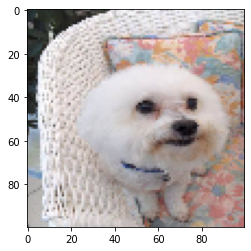

In [ ]:
for category in categories:
    path = os.path.join(my_train_img_dir,category)
    class_num = categories.index(category)
    
    for img in os.listdir(path):
        img_array = load_img(os.path.join(path,img), target_size=(100,100))
        new_array = img_to_array(img_array)
        plt.imshow(array_to_img(new_array))
        plt.show()
        break
    break

### Batches of Image

In [ ]:
training_data = []
test_data = []
valid_data = []
 
def create_training_data(directory,categories, data):
    for category in categories:
        path = os.path.join(directory,category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = load_img(os.path.join(path,img), target_size=(100,100))
                new_array = img_to_array(img_array)
                data.append([new_array, class_num])
            except Exception as e:
                pass

In [ ]:
 
%%time
create_training_data(directory=my_train_img_dir,
                     categories=categories, data=training_data)
create_training_data(directory=my_test_img_dir, categories= categories,
                    data=test_data)
create_training_data(directory=my_val_img_dir, categories=categories,
                    data=valid_data)

CPU times: user 3.37 s, sys: 276 ms, total: 3.64 s
Wall time: 4min 55s


In [ ]:
print(len(training_data))
print(len(test_data))
print(len(valid_data))

1000
100
200


In [ ]:
import random
 
random.shuffle([training_data,valid_data,test_data])

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

In [ ]:
def get_features_and_labels(data, features, labels):
    for feature, label in data:
        features.append(feature)
        labels.append(label)
    return features, labels

In [ ]:
X_train,y_train = get_features_and_labels(training_data,X_train,y_train)
X_test,y_test = get_features_and_labels(test_data,X_test,y_test)
X_valid,y_valid = get_features_and_labels(valid_data,X_valid,y_valid)

In [ ]:
print(len(X_train), len(X_test),
      len(X_valid), len(y_train),
      len(y_test), len(y_valid))

1000 100 200 1000 100 200


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)
 
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [ ]:
print(type(X_train), type(X_test), type(X_valid),
      type(y_train), type(y_test), type(y_valid))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Text(0.5, 1.0, 'cat')

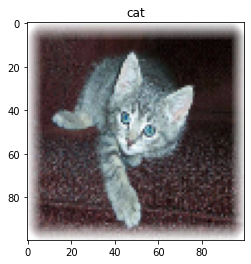

In [ ]:
plt.imshow(array_to_img(X_train[596]))
plt.title(categories[y_train[596]])

In [ ]:
def rescale(data):
    
    data = data/255
    
    return data

In [ ]:
X_train = rescale(X_train)
X_test = rescale(X_test)
X_valid = rescale(X_valid)

In [ ]:
print(X_train[245].max(), X_train[632].min(),
      X_test[34].max(), X_test[32].min(),
      X_valid[135].max(), X_valid[144].min())

1.0 0.03529412 1.0 0.0 1.0 0.0


In [ ]:
X_train.shape

(1000, 100, 100, 3)

# Model Architecture

In [ ]:
 model = Sequential()
 
model.add(Conv2D(filters = 32,kernel_size=[2,2], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 64,kernel_size=[2,2], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 72,kernel_size=[7,7], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Flatten())
 
model.add(Dense(units=128, activation='relu', input_shape=(100,100,3)))
model.add(Dropout(0.3))
 
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics =['accuracy']) # you can change to acc
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 72)        225864    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 72)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min",
                           patience=2 )

checkpoint = ModelCheckpoint(filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                             monitor='val_loss', mode = "min", save_best_only=True)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid,y_valid),
         callbacks=[early_stop,checkpoint], batch_size=16, epochs=20)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 0.6955 - accuracy: 0.5240 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.5360 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6882 - accuracy: 0.5230 - val_loss: 0.6658 - val_accuracy: 0.5850
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 0.6826 - accuracy: 0.5300 - val_loss: 0.6781 - val_accuracy: 0.5850
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6758 - accuracy: 0.5720 - val_loss: 0.6159 - val_accuracy: 0.6300
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6476 - accuracy: 0.6180 - val_loss: 0.6123 - val_accuracy: 0.6900
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.6337 - accuracy: 0.6540 - val_loss: 0.6271 - val_accuracy: 0.6850
Epoch 8/20
63/63 [=

In [ ]:
model.save("/content/gdrive/My Drive/Deep Learning/cat_and_dog.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

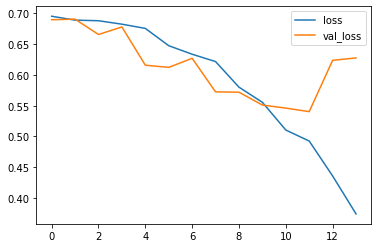

In [ ]:
losses[['loss', 'val_loss']].plot()

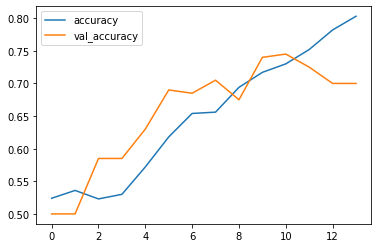

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()
# can change to acc if acc is passed in model archi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict_classes(X_valid)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       100
           1       0.69      0.73      0.71       100

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



In [ ]:
test_pred = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63        50
           1       0.64      0.74      0.69        50

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



In [ ]:
print(confusion_matrix(y_test, test_pred))

[[29 21]
 [13 37]]


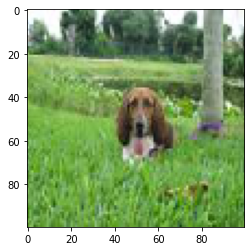

In [ ]:
#23, 96, 76, 7
#45, 33, 73, 85

single_img = X_test[23]

plt.imshow(array_to_img(single_img))

In [ ]:
pred = model.predict_classes(np.expand_dims(single_img,axis=0))

In [ ]:
for i in pred:
    for j in i:
        print(categories[j])

dog


# My own Model Architecture

In [ ]:
 model = Sequential()
# Lemme shape like filter.
model.add(Conv2D(filters = 32,kernel_size=[2,2], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters = 64,kernel_size=[3,3], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=72, kernel_size=[3,3], padding='same',
                 input_shape=(100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128,kernel_size=[7,7], padding = 'valid',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Flatten())
 
model.add(Dense(units=256, activation='relu', input_shape=(100,100,3)))
model.add(Dropout(0.3))# is a proba
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics =['acc'])
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 32)      416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 72)        41544     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 72)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
 model.fit(X_train, y_train, validation_data=(X_valid,y_valid),
         callbacks=[early_stop,checkpoint], batch_size=16, epochs=20)

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6961 - acc: 0.4790 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6950 - acc: 0.4920 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6940 - acc: 0.4800 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6939 - acc: 0.5050 - val_loss: 0.6823 - val_acc: 0.5000
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6857 - acc: 0.5300 - val_loss: 0.6911 - val_acc: 0.5450
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6801 - acc: 0.5500 - val_loss: 0.6717 - val_acc: 0.5750
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6731 - acc: 0.5720 - val_loss: 0.6634 - val_acc: 0.5850
Epoch 8/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6692 - acc: 0.5

In [ ]:
 losses = pd.DataFrame(model.history.history)

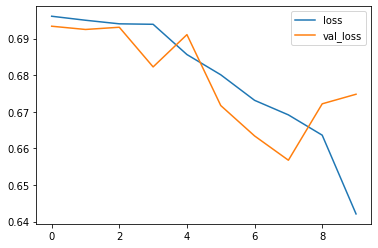

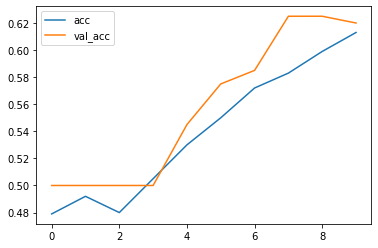

In [ ]:
losses[['loss', 'val_loss']].plot()
losses[['acc', 'val_acc']].plot()

In [ ]:
 predictions = model.predict_classes(X_valid)

In [ ]:
 print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67       100
           1       0.67      0.48      0.56       100

    accuracy                           0.62       200
   macro avg       0.63      0.62      0.61       200
weighted avg       0.63      0.62      0.61       200



In [ ]:
test_pred = model.predict_classes(X_test)

print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67        50
           1       0.67      0.58      0.62        50

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100

[[36 14]
 [21 29]]
